<a href="https://colab.research.google.com/github/phongidoit/Computer_vision/blob/main/alexnet%2C%20Classification%20Boot%20and%20Sandal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
#/content/drive/MyDrive/Sandal_Boot.zip
!ls /content/drive/MyDrive/Sandal_Boot.zip
!unzip -q /content/drive/MyDrive/Sandal_Boot.zip

/content/drive/MyDrive/Sandal_Boot.zip


In [ ]:
import pandas as pd
import numpy as np
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import random
from skimage.transform import resize 
from keras import utils 
from scipy.ndimage import rotate
import gc

from sklearn.metrics import confusion_matrix 


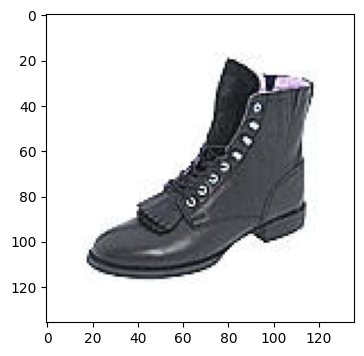

In [ ]:
path =  r'/content/Shoe vs Sandal vs Boot Dataset'
target_w, target_h= 136, 102
test_ratio, validation_ratio=0.2, 0.2

label, X, y =[], [], []
for dir in [f.path for f in os.scandir(path) if f.is_dir()]:
  label.append(dir.split('/')[-1]) #chỉ lấy tên file, không cần lấy tên directory
  for file in next(os.walk(dir), (None, None, []))[2]:
    if file != ".ipynb_checkpoints":
        file_path = os.path.join(dir, file)
        
        img = cv2.imread(file_path)
        #add padding from (102,136) -> (136,136)
        color=(255,255,255) #white
        result = np.full((136,136, 3), color, dtype=np.uint8)
        x_center = (136 - img.shape[1]) // 2
        y_center = (136 - img.shape[0]) // 2

        #print(img.shape)
        result[y_center:y_center+img.shape[0], x_center:x_center+img.shape[1]] = img
        img = result

        img_array = np.asarray(img)
        X.append(img_array)
        y.append(dir.split('/')[-1])

#sample image
plt.figure(figsize=(4,4))
plt.imshow(X[0])

In [ ]:
y_out = []
for i, val in enumerate(y):
  y_out.append(label.index(val))

y = y_out.copy()
print(label)

['Boot', 'Sandal']


In [ ]:
#shuffle data
X_y = list(zip(X, y))
random.shuffle(X_y)
X, y = zip(*X_y)

n_samples = len(X)
n_test= int(n_samples * test_ratio)
n_validation = int(n_samples * validation_ratio)

out_w, out_h=224,224
#split data into 3 set
X_test, y_test= X[:n_test], y[:n_test]
X_val, y_val = X[n_test: n_test + n_validation], y[n_test: n_test + n_validation]
X_train, y_train = X[n_test+n_validation:], y[n_test+n_validation:]

n_train = len(X_train)

#resize image to standard size
X_train = [resize(img, (out_w, out_h), anti_aliasing=True ) for img in X_train]
X_val = [resize(img, (out_w, out_h), anti_aliasing=True ) for img in X_val]
X_test = [resize(img, (out_w, out_h), anti_aliasing=True ) for img in X_test]

#convert everything to numpy array
combine=[X_train, y_train, X_val, y_val, X_test, y_test]
X_train, y_train, X_val, y_val, X_test, y_test = [np.asarray(ele) for ele in combine]
del X,y,X_y

In [ ]:
num_classes= len(label)

#one-hot encode
Y_train = utils.to_categorical(y_train, num_classes)
Y_val = utils.to_categorical(y_val, num_classes)
Y_test = utils.to_categorical(y_test, num_classes)

for i in range(5):
  print("Label: ", y_train[i]," Encode:",Y_train[i])

Label:  0  Encode: [1. 0.]
Label:  1  Encode: [0. 1.]
Label:  0  Encode: [1. 0.]
Label:  1  Encode: [0. 1.]
Label:  0  Encode: [1. 0.]


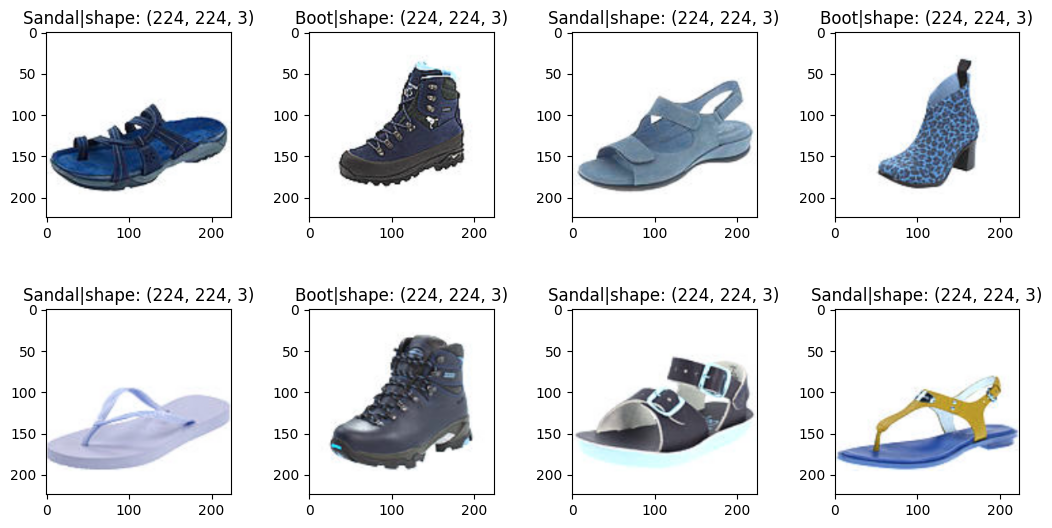

In [ ]:
import matplotlib.image as mpimg
plt.figure(figsize=(13,6))
for i in range(1,9):
  plt.subplot(2,4,i)
  im1=X_train[i]
  plt.subplots_adjust(hspace=0.5)
  out1=label[y_train[i]] +"|shape: "+ str(im1.shape)
  plt.title(out1)
  plt.imshow(im1)


In [ ]:
import keras.layers as layers
from tensorflow import keras

model_alex = keras.Sequential()

model_alex.add(layers.Conv2D(96, (11, 11), padding='same', strides=(4,4),activation='relu', input_shape=(227, 227, 3)))
model_alex.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model_alex.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
model_alex.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model_alex.add(layers.Conv2D(384, (3, 3), padding='same',activation='relu'))
model_alex.add(layers.Conv2D(384, (3, 3), padding='same',activation='relu'))
model_alex.add(layers.Conv2D(256, (3, 3), padding='same',activation='relu'))
model_alex.add(layers.MaxPooling2D((3, 3), strides=(2,2)))

model_alex.add(layers.Flatten())
model_alex.add(layers.Dense(4096,activation='relu'))
model_alex.add(layers.Dense(4096,activation='relu'))
model_alex.add(layers.Dense(2, activation='sigmoid'))

model_alex.compile(loss='categorical_crossentropy' , optimizer=keras.optimizers.SGD(learning_rate = 0.001) , metrics=['acc'])
model_alex.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 57, 57, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

In [ ]:
history = model_alex.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val, Y_val)
)


Epoch 1/10
38/38 [==============================] - 16s 95ms/step - loss: 0.6882 - acc: 0.7525 - val_loss: 0.6842 - val_acc: 0.8650
Epoch 2/10
38/38 [==============================] - 2s 53ms/step - loss: 0.6816 - acc: 0.8467 - val_loss: 0.6786 - val_acc: 0.8050
Epoch 3/10
38/38 [==============================] - 2s 53ms/step - loss: 0.6761 - acc: 0.8542 - val_loss: 0.6732 - val_acc: 0.7750
Epoch 4/10
38/38 [==============================] - 2s 59ms/step - loss: 0.6700 - acc: 0.7975 - val_loss: 0.6666 - val_acc: 0.8575
Epoch 5/10
38/38 [==============================] - 2s 59ms/step - loss: 0.6633 - acc: 0.8517 - val_loss: 0.6586 - val_acc: 0.9175
Epoch 6/10
38/38 [==============================] - 2s 54ms/step - loss: 0.6545 - acc: 0.8833 - val_loss: 0.6487 - val_acc: 0.9325
Epoch 7/10
38/38 [==============================] - 2s 55ms/step - loss: 0.6437 - acc: 0.9133 - val_loss: 0.6366 - val_acc: 0.8725
Epoch 8/10
38/38 [==============================] - 2s 54ms/step - loss: 0.6295 - 

In [ ]:
from sklearn.svm import SVC
import seaborn as sns

def evaluation(p,y):
    matrix=np.zeros((2,2))
    for i in range(len(y)):
        matrix[ round(p[i]) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_score= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_score

def Visualized_matrix(result):
  #plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=[label[0],label[1]],yticklabels=[label[0],label[1]]) 
  ax.set(xlabel='True Value',ylabel='Predict value') 

def the_result(result):
    print("accuracy:",result[0],"\nprecison:",result[5],"\nrecall:",result[6],"\nf-score:",result[7])



In [ ]:
model_alex.pop() #bỏ layer classification cuối cùng
feature_map=model_alex(X_train) #dữ liệu qua model tạo thành feature map -> SVM
clf = SVC()
clf.fit(feature_map, y_train)

feature_map_val  = model_alex(X_val)
prediction_val = clf.predict(feature_map_val)
result =  evaluation(prediction_val, y_val)
the_result(result)
Visualized_matrix(result)

accuracy: 0.96 
precison: 0.995 
recall: 0.92991 
f-score: 0.96135


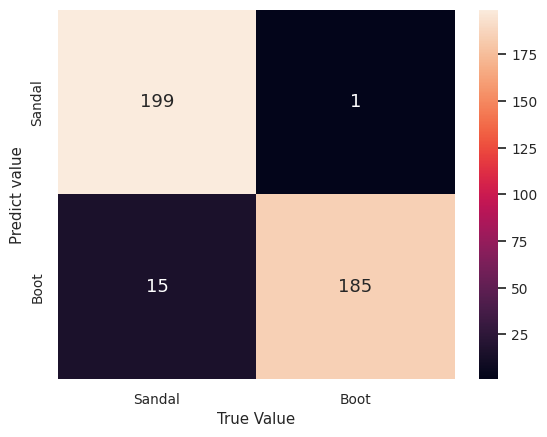

In [ ]:
#how model predict on test set
feature_map_test  = model_alex(X_test)
prediction_test = clf.predict(feature_map_test)
result =  evaluation(prediction_test, y_test)
the_result(result)
Visualized_matrix(result)

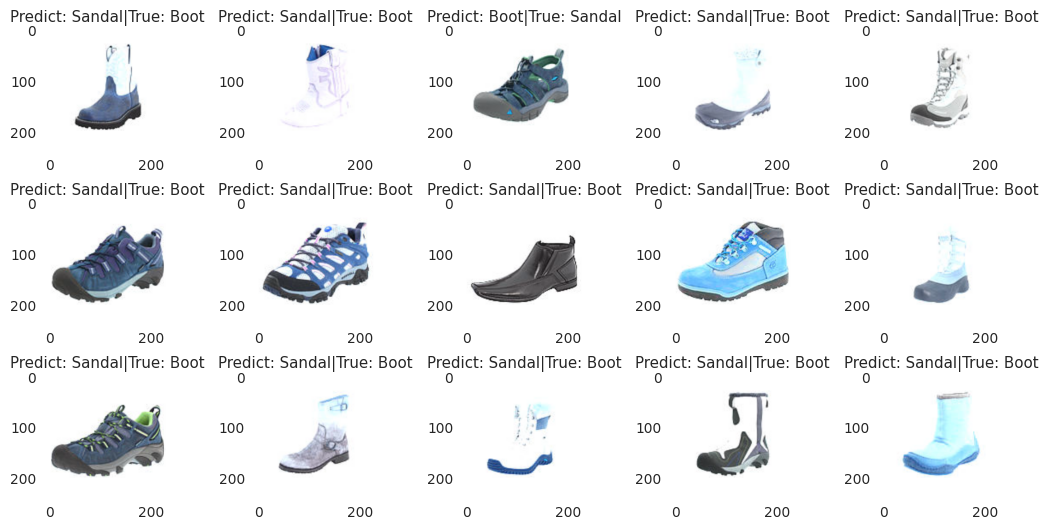

In [ ]:
#view over the one that the model fail to predict to see what happen
fail=[]
for index, pred in enumerate(prediction_test):
  if pred != y_test[index]:
    fail.append(index)
plt.rcParams["axes.grid"] = False


dic={0:label[0], 1:label[1]}
plt.figure(figsize=(13,6))
for index in range(15):
  plt.subplot(3,5,index+1)
  plt.subplots_adjust(hspace=0.5)
  plt.imshow(X_test[fail[index]])
  out="Predict: "+str(dic[prediction_test[fail[index]]]) + "|True: "+ str(dic[y_test[fail[index]]])
  plt.title(out)

In [ ]:
#Now with using VGG16 model
model_vgg=keras.Sequential()
model_vgg.add(layers.Conv2D(64,(3,3), activation='relu',padding='same', input_shape=(227,227,3)))
model_vgg.add(layers.Conv2D(64,(3,3), activation='relu',padding='same'))
model_vgg.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model_vgg.add(layers.Conv2D(128,(3,3),activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(128,(3,3),activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D(2,2))
model_vgg.add(layers.Conv2D(256,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(256,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(256,(1,1), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model_vgg.add(layers.Conv2D(512,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512,(1,1), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2,2),strides=(2,2)))
model_vgg.add(layers.Conv2D(512,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512,(3,3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(512,(1,1), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2,2),strides=(2,2)))

model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(4096, activation='relu'))
model_vgg.add(layers.Dense(4096, activation='relu'))
model_vgg.add(layers.Dense(2, activation='softmax'))
model_vgg.compile(loss='categorical_crossentropy' , optimizer=keras.optimizers.SGD(learning_rate = 0.001) , metrics=['acc'])
model_vgg.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 227, 227, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 113, 113, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 113, 113, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [ ]:
model_vgg.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, Y_val)
)

Epoch 1/10
38/38 [==============================] - 47s 617ms/step - loss: 0.6930 - acc: 0.5150 - val_loss: 0.6928 - val_acc: 0.6825
Epoch 2/10
38/38 [==============================] - 17s 443ms/step - loss: 0.6928 - acc: 0.5567 - val_loss: 0.6927 - val_acc: 0.5275
Epoch 3/10
38/38 [==============================] - 17s 448ms/step - loss: 0.6926 - acc: 0.5417 - val_loss: 0.6926 - val_acc: 0.5225
Epoch 4/10
38/38 [==============================] - 16s 422ms/step - loss: 0.6925 - acc: 0.6700 - val_loss: 0.6925 - val_acc: 0.5125
Epoch 5/10
38/38 [==============================] - 16s 429ms/step - loss: 0.6924 - acc: 0.5042 - val_loss: 0.6924 - val_acc: 0.5125
Epoch 6/10
38/38 [==============================] - 16s 435ms/step - loss: 0.6924 - acc: 0.5042 - val_loss: 0.6923 - val_acc: 0.5125
Epoch 7/10
38/38 [==============================] - 18s 469ms/step - loss: 0.6923 - acc: 0.5042 - val_loss: 0.6922 - val_acc: 0.5125
Epoch 8/10
38/38 [==============================] - 18s 471ms/step - 

13/13 [==============================] - 1s 111ms/step
accuracy: 0.9675 
precison: 0.97396 
recall: 0.95897 
f-score: 0.96641


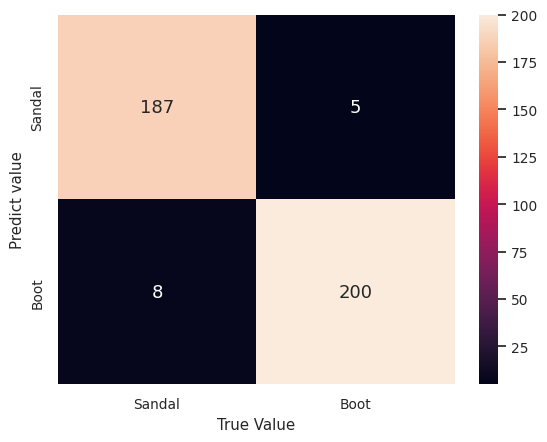

In [ ]:
#model_vgg.pop()

clf_1 = SVC()
feature_map = model_vgg.predict(X_train)
clf_1.fit(feature_map,y_train)
feature_map = model_vgg.predict(X_val)
prediction_val = clf_1.predict(feature_map)
result = evaluation(prediction_val, y_val)
Visualized_matrix(result)
the_result(result)

In [ ]:
X_train.shape

(1200, 227, 227, 3)

13/13 [==============================] - 1s 116ms/step
accuracy: 0.975 
precison: 0.98077 
recall: 0.97143 
f-score: 0.97608


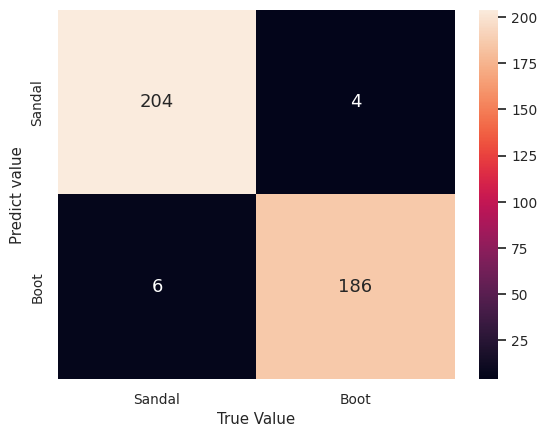

In [ ]:
feature_map_test  = model_vgg.predict(X_test)
prediction_test = clf_1.predict(feature_map_test)
result =  evaluation(prediction_test, y_test)
the_result(result)
Visualized_matrix(result)

In [ ]:
#GoogLENet
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers import concatenate

def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis=-1)
  return output_layer

def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Auxiliary 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(2, activation = 'softmax')(X1)

  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  #Auxiliary 2
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(2, activation = 'softmax')(X2)
  
  #Main branch
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  X = GlobalAveragePooling2D(name = 'GAPL')(X)
  X = Dropout(0.4)(X)
  X = Dense(2, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model  

In [ ]:
import keras
model_g = GoogLeNet()
model_g.compile(loss='categorical_crossentropy' , optimizer=keras.optimizers.SGD(learning_rate = 0.005) , metrics=['acc'])
model_g.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 54, 54, 64)   0           ['conv2d[0][0]']                 
                                                                                          

In [ ]:
model_g.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=16,
    validation_data=(X_val, Y_val),  
)

Epoch 1/10
75/75 [==============================] - 26s 84ms/step - loss: 2.0756 - dense_4_loss: 0.6928 - dense_1_loss: 0.6904 - dense_3_loss: 0.6925 - dense_4_acc: 0.5242 - dense_1_acc: 0.5358 - dense_3_acc: 0.5233 - val_loss: 2.0704 - val_dense_4_loss: 0.6926 - val_dense_1_loss: 0.6864 - val_dense_3_loss: 0.6914 - val_dense_4_acc: 0.4875 - val_dense_1_acc: 0.8525 - val_dense_3_acc: 0.7925
Epoch 2/10
75/75 [==============================] - 4s 58ms/step - loss: 2.0660 - dense_4_loss: 0.6926 - dense_1_loss: 0.6832 - dense_3_loss: 0.6902 - dense_4_acc: 0.5217 - dense_1_acc: 0.6142 - dense_3_acc: 0.5817 - val_loss: 2.0617 - val_dense_4_loss: 0.6920 - val_dense_1_loss: 0.6808 - val_dense_3_loss: 0.6889 - val_dense_4_acc: 0.5125 - val_dense_1_acc: 0.6350 - val_dense_3_acc: 0.5150
Epoch 3/10
75/75 [==============================] - 4s 58ms/step - loss: 2.0596 - dense_4_loss: 0.6919 - dense_1_loss: 0.6795 - dense_3_loss: 0.6882 - dense_4_acc: 0.5392 - dense_1_acc: 0.6250 - dense_3_acc: 0.605

13/13 [==============================] - 1s 43ms/step
accuracy: 0.9575 
precison: 0.96354 
recall: 0.94872 
f-score: 0.95607


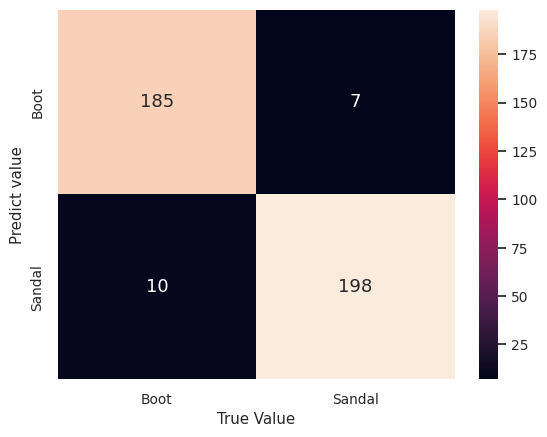

In [ ]:
prediction= model_g.predict(X_val)
prediction_val=prediction[0]
prediction_val=np.argmax(prediction_val, axis=1)
result =  evaluation(prediction_val, y_val)
the_result(result)
Visualized_matrix(result)

accuracy: 0.945 
precison: 0.96552 
recall: 0.92891 
f-score: 0.94686


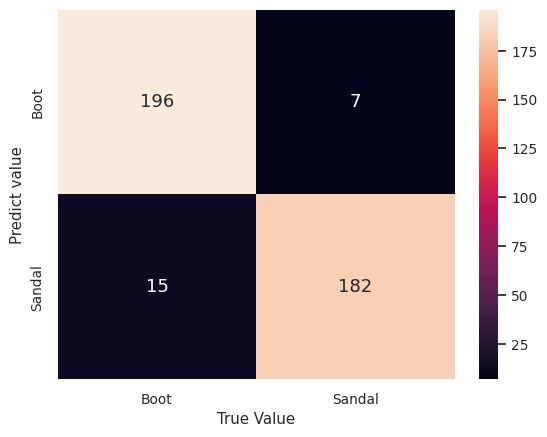

In [ ]:
prediction= model_g.predict(X_test)
prediction_test=prediction[0]
prediction_test=np.argmax(prediction_test, axis=1)

result =  evaluation(prediction_test, y_test)
the_result(result)
Visualized_matrix(result)

In [ ]:
len(prediction[2])

400